# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> We have here dataset of movies produced from 1960 to 2015.The dataset contains the following columns(I'll list the important columns to me):<br>
-Popularity of each movie <br>
-Budget and revenue <br>
-Movie name and runtime <br>
-Genres and release year <br>


### Question(s) for Analysis
>Now I'll make question to start the analysis: <br>
1- What are the average movies budgets and revenue year by year? And which year that has the maximum budget and revenue average? <br>
2- What is the most popular movie year by year?

In [1]:
# Importing statements for all of the packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Making function to plot barchart
def bar_plot(df,Title,X,Y):
    df.plot(kind='bar', title=Title,figsize=(15,8),colormap='tab20c');
    plt.xlabel(X, fontsize=18);
    plt.ylabel(Y, fontsize=18);

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Loadind the dataset and printing out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Showing number of rows and columns of the original dataset
df.shape

(10866, 21)

In [5]:
#Printing all information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Here some descriptions about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
 

### I'll drop a few columns that are useless to me 

In [7]:
# Droping the columns and printing few lines of the new data
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Now I'll check if there are null values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


### I found some missing data in the column "production_companies". I can't fill it because it's a string column, so I'll drop all rows that have missing values.

In [9]:
# Droping rows with missing values
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [11]:
# Droping duplicated values
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


### In budget and revenue columns I found some values that don't make sense, so I'll drop the rows that have budget = 0 or revenue = 0. And and I'll store in a new datafarme to continue working on these two columns.

In [13]:
# Dropping rows that have budget = 0 or revenue = 0
df_bud_rev = df.drop(df[(df['budget']==0) | (df['revenue']==0)].index)

In [14]:
# printing few lines of the new dataframe
df_bud_rev.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### After that I'll put a condition to take the rows that have budget and revenue bigger than or equal to 10% of these columns values.

In [15]:
# Taking the rows that have budget and revenue bigger than or equal to 10% of these columns values.
# Saving the dataframe in "df_new" and it's the cleaned dataframe
df_new = df_bud_rev[df_bud_rev.budget >= df_bud_rev.budget.quantile(0.1)]
df_new = df_new[df_new.revenue >= df_new.revenue.quantile(0.1)]
df_new.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
df_new.shape

(3082, 15)

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3082 non-null float64
budget                  3082 non-null int64
revenue                 3082 non-null int64
original_title          3082 non-null object
cast                    3082 non-null object
director                3082 non-null object
runtime                 3082 non-null int64
genres                  3082 non-null object
production_companies    3082 non-null object
release_date            3082 non-null object
vote_count              3082 non-null int64
vote_average            3082 non-null float64
release_year            3082 non-null int64
budget_adj              3082 non-null float64
revenue_adj             3082 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 385.2+ KB


### Here is the distribution of the numeric columns.

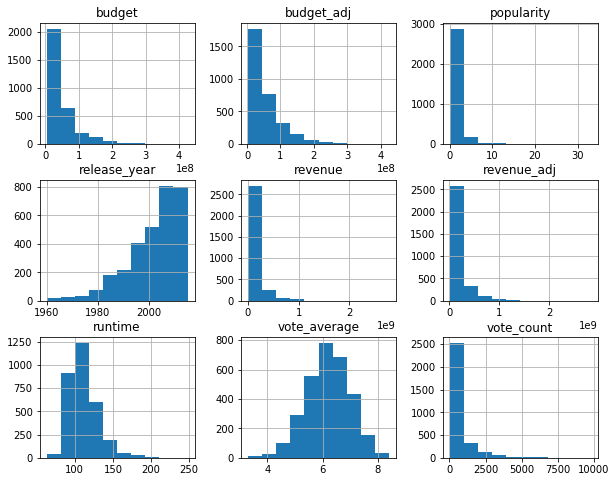

In [18]:
df_new.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis



## Research Question 1 (What are the average movies budgets and revenue year by year? And which year that has the maximum budget and revenue average?)

### I'll group the dataframe by (release year) and choose the (budget) column to get its mean for each year, then plot using barchart.

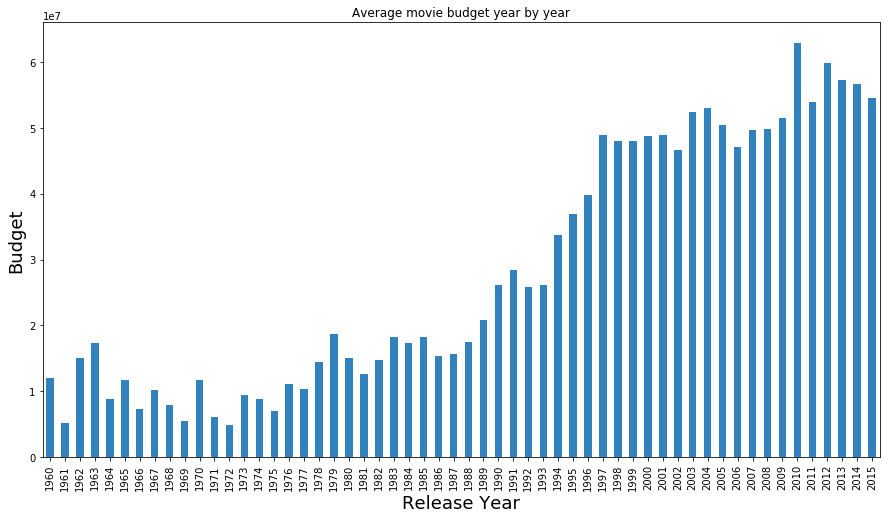

In [19]:
budget_means = df_new.groupby('release_year')['budget'].mean();
bar_plot(budget_means,'Average movie budget year by year','Release Year','Budget')

### Doing the same thing like (budget) column but I'll take (revenue) column.

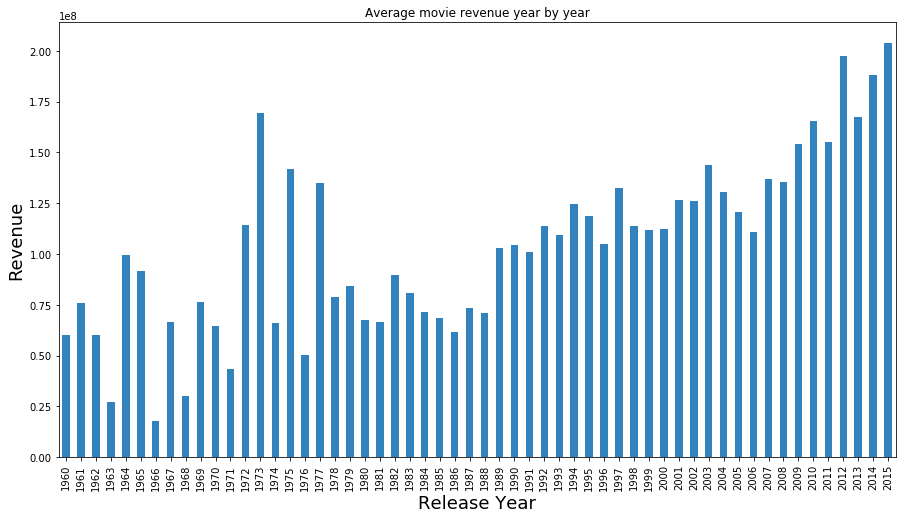

In [20]:
revenue_means = df_new.groupby('release_year')['revenue'].mean();
bar_plot(revenue_means,'Average movie revenue year by year','Release Year','Revenue')

In [21]:
# Getting the year that has the maximum budget mean
print('Year that has max budget mean :',budget_means.idxmax())

Year that has max budget mean : 2010


In [22]:
# Getting the year that has the maximum revenue mean
print('Year that has max revenue mean :',revenue_means.idxmax())

Year that has max revenue mean : 2015


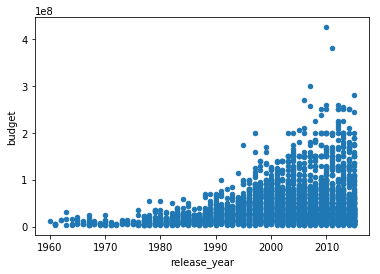

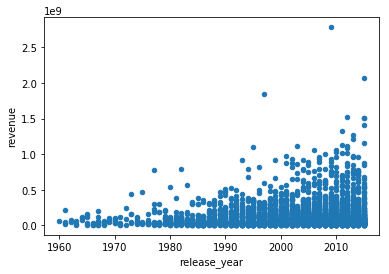

In [23]:
# Using sctter plot to show the distribution between (budget and release year)
# and (revenue and release_year)
df_new.plot(x='release_year', y='budget', kind='scatter');
df_new.plot(x='release_year', y='revenue', kind='scatter');

### Research Question 2  (What is the most popular movie year by year?)

#### I'll group the dataframe by (release year) and choose the (popularity) column to get the maximum popularity for each year.

In [24]:
year_popularity_df = df_new.groupby('release_year')['popularity'].max()
year_popularity_df

release_year
1960     1.136943
1961     2.631987
1962     1.168767
1963     0.920094
1964     3.153791
1965     1.910465
1966     0.670274
1967     2.550704
1968     3.309196
1969     1.778746
1970     1.936962
1971     1.755117
1972     5.738034
1973     2.272486
1974     3.264571
1975     2.563191
1976     0.924068
1977    12.037933
1978     1.697618
1979     4.935897
1980     5.488441
1981     4.578300
1982     4.215642
1983     4.828854
1984     4.831966
1985     6.095293
1986     2.485419
1987     3.474728
1988     3.777441
1989     4.143585
1990     2.679627
1991     3.852269
1992     3.966538
1993     2.571339
1994     8.093754
1995     4.765359
1996     4.480733
1997     4.355219
1998     4.180540
1999     8.947905
2000     4.271452
2001     8.575419
2002     8.095275
2003     7.122455
2004     5.827781
2005     5.939927
2006     5.838503
2007     4.965391
2008     8.466668
2009     9.432768
2010     9.363643
2011     7.959228
2012     7.637767
2013     6.112766
2014    24.9491

In [25]:
# getting popularity values from (year_popularity_df) and save in a list (popularity_score)
popularity_score = year_popularity_df.values
popularity_score

array([  1.136943,   2.631987,   1.168767,   0.920094,   3.153791,
         1.910465,   0.670274,   2.550704,   3.309196,   1.778746,
         1.936962,   1.755117,   5.738034,   2.272486,   3.264571,
         2.563191,   0.924068,  12.037933,   1.697618,   4.935897,
         5.488441,   4.5783  ,   4.215642,   4.828854,   4.831966,
         6.095293,   2.485419,   3.474728,   3.777441,   4.143585,
         2.679627,   3.852269,   3.966538,   2.571339,   8.093754,
         4.765359,   4.480733,   4.355219,   4.18054 ,   8.947905,
         4.271452,   8.575419,   8.095275,   7.122455,   5.827781,
         5.939927,   5.838503,   4.965391,   8.466668,   9.432768,
         9.363643,   7.959228,   7.637767,   6.112766,  24.949134,
        32.985763])

#### Now I'll use (popularity_score) list to get the corresponding movie to its popularity score.
#### First I'll merge the movie name column (original_title) with (release_year) column to make a new column  (movie_year).
#### Then I'll make an empty list (top_movies) , and iterate through (popularity_score) list to add the movie title in the (top_movies) list.

In [26]:
top_movies = []
df_new['movie_year'] = df_new['original_title'] + ' ' + df_new['release_year'].astype(str)
for popularity in popularity_score:
    top_movies.append(df_new[df_new['popularity']==popularity]['movie_year'].values[0])
top_movies    

['Spartacus 1960',
 'One Hundred and One Dalmatians 1961',
 'Lawrence of Arabia 1962',
 'Charade 1963',
 'Goldfinger 1964',
 'Thunderball 1965',
 "Who's Afraid of Virginia Woolf? 1966",
 'The Jungle Book 1967',
 '2001: A Space Odyssey 1968',
 "On Her Majesty's Secret Service 1969",
 'The Aristocats 1970',
 'Diamonds Are Forever 1971',
 'The Godfather 1972',
 'Robin Hood 1973',
 'The Godfather: Part II 1974',
 'Jaws 1975',
 "Logan's Run 1976",
 'Star Wars 1977',
 'Grease 1978',
 'Alien 1979',
 'The Empire Strikes Back 1980',
 'Raiders of the Lost Ark 1981',
 'Blade Runner 1982',
 'Return of the Jedi 1983',
 'The Terminator 1984',
 'Back to the Future 1985',
 'Aliens 1986',
 'Predator 1987',
 'Die Hard 1988',
 'The Little Mermaid 1989',
 'Total Recall 1990',
 'Beauty and the Beast 1991',
 'Aladdin 1992',
 'Groundhog Day 1993',
 'Pulp Fiction 1994',
 'Se7en 1995',
 'Independence Day 1996',
 'Titanic 1997',
 'The Truman Show 1998',
 'Fight Club 1999',
 'Gladiator 2000',
 'The Lord of the R

In [27]:
# Making a dataframe with two columns 
# First one is movie column that has top_movies list
# Second one i popularity column that has popularity_score list
data = {'movie':top_movies, 'popularity':popularity_score}
popularity_movie_df = pd.DataFrame(data)
print(popularity_movie_df)

                                                movie  popularity
0                                      Spartacus 1960    1.136943
1                 One Hundred and One Dalmatians 1961    2.631987
2                             Lawrence of Arabia 1962    1.168767
3                                        Charade 1963    0.920094
4                                     Goldfinger 1964    3.153791
5                                    Thunderball 1965    1.910465
6                Who's Afraid of Virginia Woolf? 1966    0.670274
7                                The Jungle Book 1967    2.550704
8                          2001: A Space Odyssey 1968    3.309196
9                On Her Majesty's Secret Service 1969    1.778746
10                                The Aristocats 1970    1.936962
11                          Diamonds Are Forever 1971    1.755117
12                                 The Godfather 1972    5.738034
13                                    Robin Hood 1973    2.272486
14        

#### Now I can make a barchart to get the most popular movie year by year and its corresponding popularity score 

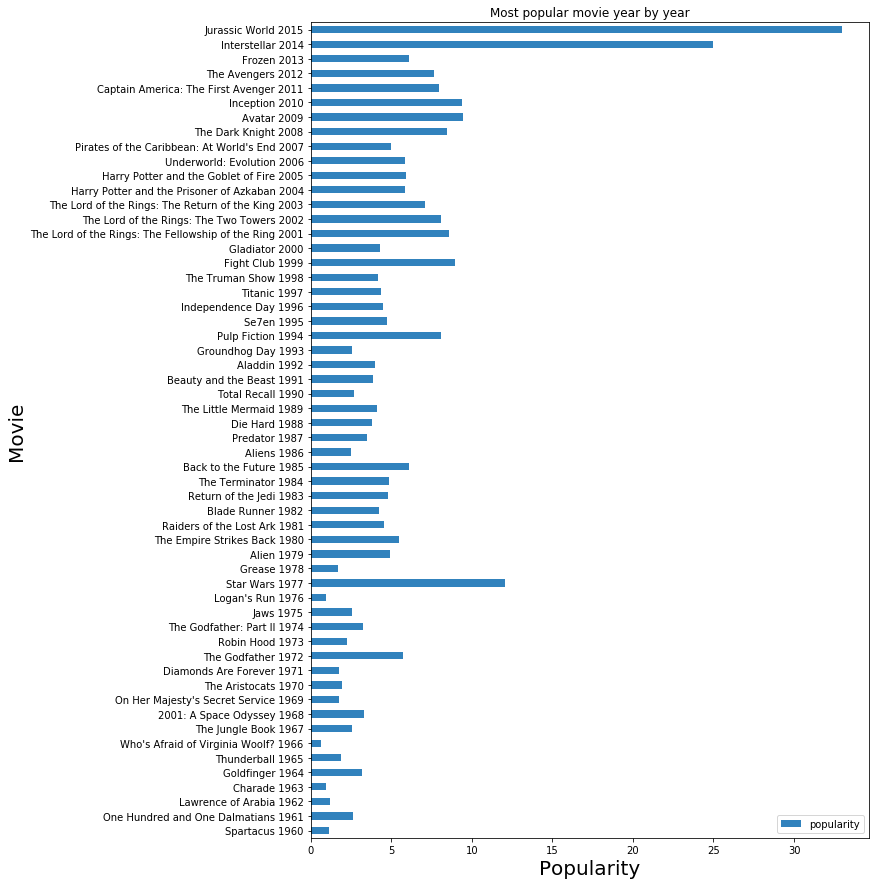

In [28]:
popularity_movie_df.plot(x='movie', y='popularity', kind='barh', title='Most popular movie year by year', figsize=(10,15),colormap='tab20c');
plt.xlabel('Popularity', fontsize=20);
plt.ylabel('Movie', fontsize=20);

<a id='conclusions'></a>
## Conclusions

> Now let's summarize results of this analysis.
<br> 1- Fisrt thing is using histogram to show the distribution of numneric values.
<br> 2- Second thing is making two barcharts to show the average budget and revenue year by year and getting the year that has the maximum average budget and revenue.
<br> 3- Third thing is making one more barchart to get the most popular movie year by year.

> **Limitations :**
<br> There were too many missing values had to be cleaned such as budget and revenue column, they had missing values and some values that don't make sense, so that many rows are dropped for completing the analysis correctly.
